In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
import os

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

train_data=train.flow_from_directory("train",target_size=(200,200),batch_size=5,class_mode='categorical')
test_data=test.flow_from_directory("test",target_size=(200,200),batch_size=5,class_mode='categorical')

Found 907 images belonging to 3 classes.
Found 76 images belonging to 3 classes.


In [3]:
train_data.class_indices

{'aluminium': 0, 'copper': 1, 'steel': 2}

In [4]:
model=models.Sequential()
model.add(layers.Input((200,200,3)))

model.add(layers.Conv2D(16,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.fit(train_data,epochs=5,batch_size=5)

Epoch 1/5


C:\Users\91600\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


182/182 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.6124 - loss: 1.1831
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 27s 146ms/step - accuracy: 0.7905 - loss: 0.4896
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 26s 140ms/step - accuracy: 0.8342 - loss: 0.4276
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 27s 148ms/step - accuracy: 0.8875 - loss: 0.3206
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 27s 145ms/step - accuracy: 0.9154 - loss: 0.2065


In [7]:
loss,accuracy=model.evaluate(test_data)
accuracy

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8915 - loss: 0.2148


0.9078947305679321

In [8]:
#model.save('scrap_classifier.keras')

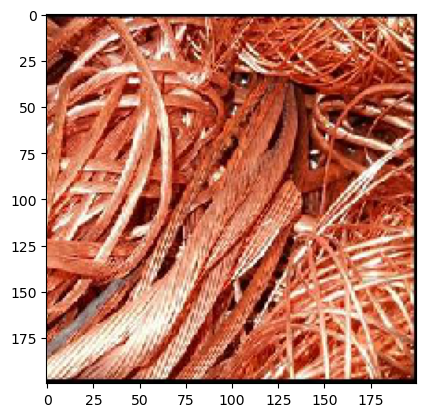

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0. 1. 0.]]
Its a copper scrap


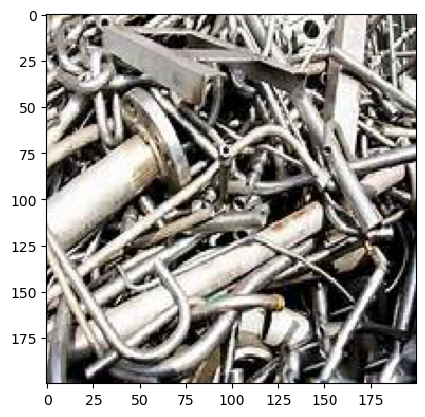

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0. 0. 1.]]
Its a steel scrap


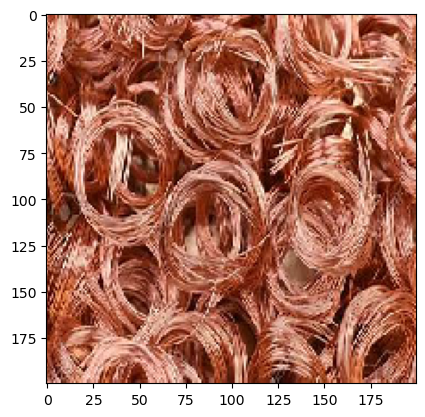

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0. 1. 0.]]
Its a copper scrap


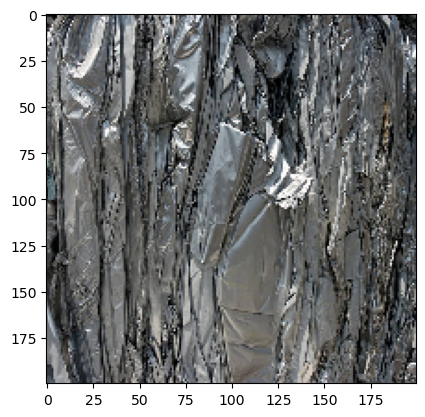

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[1. 0. 0.]]
Its a aluminium scrap


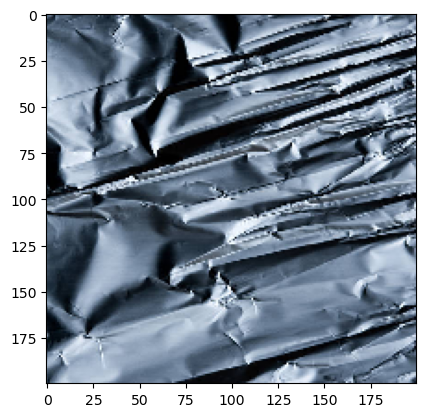

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1. 0. 0.]]
Its a aluminium scrap


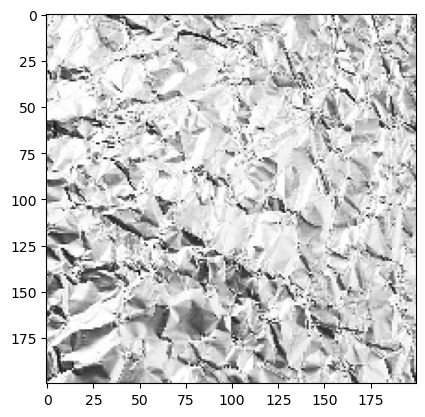

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1. 0. 0.]]
Its a aluminium scrap


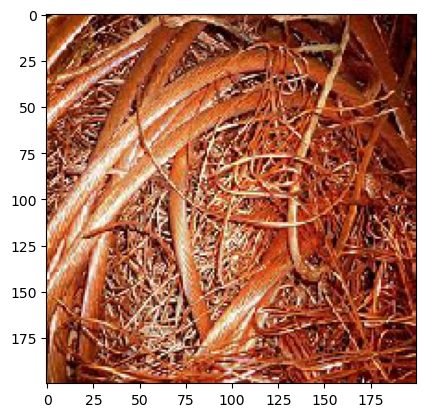

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0. 1. 0.]]
Its a copper scrap


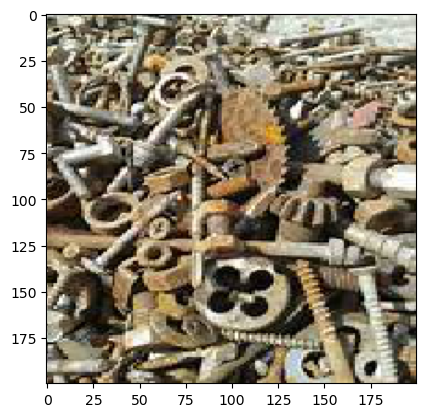

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0. 0. 1.]]
Its a steel scrap


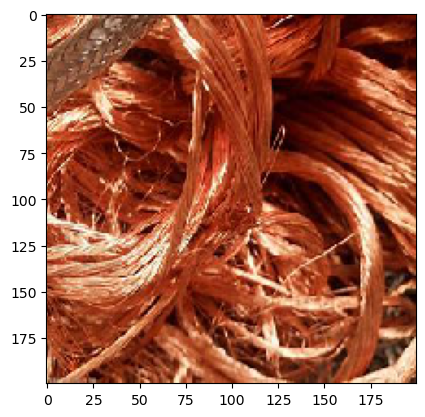

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0. 1. 0.]]
Its a copper scrap


In [9]:
path="predict"
for i in os.listdir(path):
    img=image.load_img(path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    print(val)
    if np.argmax(val)==0:
        print('Its a aluminium scrap')
    if (np.argmax(val)==1):
        print('Its a copper scrap')
    if np.argmax(val)==2:
        print("Its a steel scrap")

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,667,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,075,243 (99.47 MB)

 Trainable params: 8,691,747 (33.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,383,496 (66.31 MB)